# Investigating the unsupervised training accuracy 

In this notebook we provide code for recreating and analysing the results shown in the written and spoken digits section of the paper. First we will provide code that will train the models and save the results. 

Change 'github.com' to 'githubtocolab.com' to open the notebook in google collab. If you do this then please uncomment TODO.

In [2]:
# import parent directory 
! pip install -r ../requirements.txt
import sys
sys.path.append('..')
from train import train
from slune import get_csv_saver
import pandas as pd
from IPython.display import display

  Cloning https://github.com/h-0-0/slune (to revision main) to /tmp/pip-install-ka4bs2kx/slune-lib_ee81aee34b084262af01ffb9a08d1f0f
  Running command git clone --filter=blob:none --quiet https://github.com/h-0-0/slune /tmp/pip-install-ka4bs2kx/slune-lib_ee81aee34b084262af01ffb9a08d1f0f
  Resolved https://github.com/h-0-0/slune to commit e6baa8be8b5d66b864f34b8513a9000cb5ee30ed
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Uncomment the below and run this script to train the model and reproduce the results
# config = {
#     'benchmark': 'written_spoken_digits',
#     'model': 'FusionModel',
#     'learning_rate': 0.05,
#     'num_epochs': 1,
#     'batch_size': 128,
#     'est': 'info_critic',
#     'patience': -1,
#     'temperature': 1,
#     'output_dim': 64,
# }
# model = train(**config)

Now we will summarise the results using slune. During training and testing we also log all metrics to tensorboard, so one can also view results by using using 'tensorboard --logdir={path to results file}'. 

In [3]:
csv_saver = get_csv_saver(params = None, root_dir = '../results')

comparing_estimators = [
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 64},
]

estimator_results = []
for config in comparing_estimators:
    params, test_acc = csv_saver.read(params = config, metric_name = 'eval_test_acc', select_by ='max', avg=True)
    params, train_acc = csv_saver.read(params = config, metric_name = 'eval_train_acc', select_by ='max', avg=True)
    estimator_results.append({
        'estimator': config['est'],
        'test_accuracy': test_acc,
        'train_accuracy': train_acc,
    })

est_df = pd.DataFrame(estimator_results)

# Display the results
display(est_df)

# We also generate a latex table
est_latex_table = est_df.to_latex(
    index=False,
    caption="Comparison of ML Model Performance Metrics",
    label="tab:model_comparison",
    position="htbp",
    column_format="|l|l|l|l|",
    float_format="{:0.2f}".format
)
print(est_latex_table)

,estimator,test_accuracy,train_accuracy
0,info_critic,0.997750,0.999269
1,SimCLR,0.930875,0.937115
2,supervised,0.996318,0.999969


\begin{table}[htbp]
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{|l|l|l|l|}
\toprule
estimator & test_accuracy & train_accuracy \\
\midrule
info_critic & 1.00 & 1.00 \\
SimCLR & 0.93 & 0.94 \\
supervised & 1.00 & 1.00 \\
\bottomrule
\end{tabular}
\end{table}



In [4]:
csv_saver = get_csv_saver(params = None, root_dir = '../results')

comparing_modality = [
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'ImageOnly', 'est': 'info_critic', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'AudioOnly', 'est': 'info_critic', 'output_dim': 64},

    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'ImageOnly', 'est' : 'SimCLR', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'AudioOnly', 'est' : 'SimCLR', 'output_dim': 64},

    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'ImageOnly', 'est': 'supervised', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'AudioOnly', 'est': 'supervised', 'output_dim': 64},
]

modality_results = []
for config in comparing_modality:
    params, test_acc = csv_saver.read(params = config, metric_name = 'eval_test_acc', select_by ='max', avg=True)
    params, train_acc = csv_saver.read(params = config, metric_name = 'eval_train_acc', select_by ='max', avg=True)
    modality_results.append({
        'estimator': config['est'],
        'model': config['model'],
        'test_accuracy': test_acc,
        'train_accuracy': train_acc,
    })

modality_df = pd.DataFrame(modality_results)

# Display the results
display(modality_df)

# We also generate a latex table
modality_latex_table = modality_df.to_latex(
    index=False,
    caption="Comparison of ML Model Performance Metrics",
    label="tab:model_comparison",
    position="htbp",
    column_format="|l|l|l|l|",
    float_format="{:0.2f}".format
)
# print(modality_latex_table)

,estimator,model,test_accuracy,train_accuracy
0,info_critic,FusionModel,0.997750,0.999269
1,info_critic,ImageOnly,0.905500,0.904308
2,info_critic,AudioOnly,0.102500,0.099615
3,SimCLR,FusionModel,0.930875,0.937115
4,SimCLR,ImageOnly,0.934375,0.933750
5,SimCLR,AudioOnly,0.776000,0.794365
6,supervised,FusionModel,0.996318,0.999969
7,supervised,ImageOnly,0.986705,0.993885
8,supervised,AudioOnly,0.996023,1.000000


,estimator,output_dim,test_accuracy,train_accuracy
0,info_critic,64,0.997750,0.999269
1,info_critic,32,0.999250,0.998538
2,info_critic,16,0.995000,0.996115
3,info_critic,8,0.672750,0.673846
4,info_critic,4,0.095000,0.101269
5,info_critic,2,0.094750,0.100808
6,SimCLR,64,0.930875,0.937115
7,SimCLR,32,0.857625,0.861865
8,SimCLR,16,0.765500,0.779000
9,SimCLR,8,0.551500,0.572250


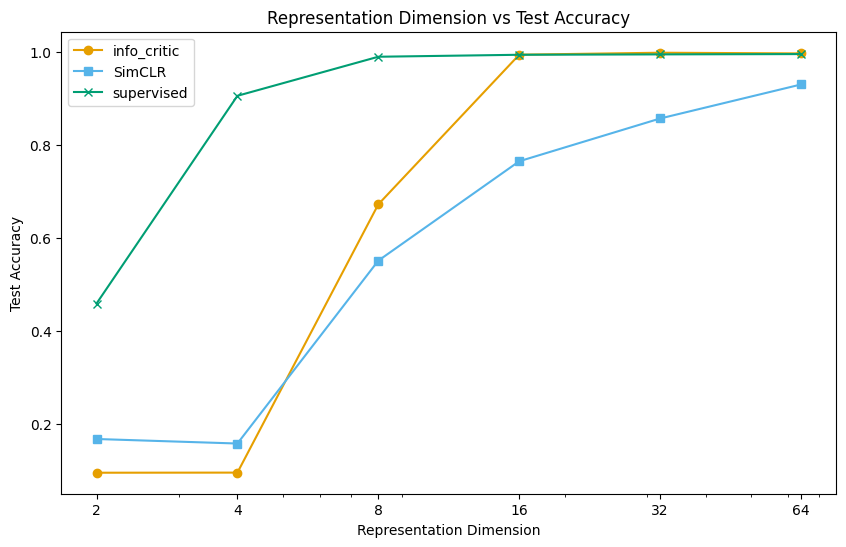

In [13]:
csv_saver = get_csv_saver(params = None, root_dir = '../results')

comparing_dim = [
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 32},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 16},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 8},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 4},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'info_critic', 'output_dim': 2},

    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 32},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 16},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 8},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 4},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est' : 'SimCLR', 'output_dim': 2},

    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 64},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 32},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 16},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 8},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 4},
    {'benchmark': 'written_spoken_digits', 'model': 'FusionModel', 'est': 'supervised', 'output_dim': 2},
]

dim_results = []
for config in comparing_dim:
    params, test_acc = csv_saver.read(params = config, metric_name = 'eval_test_acc', select_by ='max', avg=True)
    params, train_acc = csv_saver.read(params = config, metric_name = 'eval_train_acc', select_by ='max', avg=True)
    dim_results.append({
        'estimator': config['est'],
        'output_dim': config['output_dim'],
        'test_accuracy': test_acc,
        'train_accuracy': train_acc,
    })

dim_df = pd.DataFrame(dim_results)

# Display the results
display(dim_df)


# Create plot of output dimension vs test accuracy with each estimator as a line
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['-o', '-s', '-x']
okabe_ito_colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', 
                    '#0072B2', '#D55E00', '#CC79A7']
for i, est in enumerate(dim_df['estimator'].unique()):
    df = dim_df[dim_df['estimator'] == est]
    ax.plot(df['output_dim'], df['test_accuracy'], markers[i], label=est, color=okabe_ito_colors[i])
ax.set_xlabel('Representation Dimension')
ax.set_ylabel('Test Accuracy')
ax.set_title('Representation Dimension vs Test Accuracy')
ax.set_xscale('log')
ax.set_xticks(dim_df['output_dim'].unique())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend()
plt.show()